In [4]:
import numpy as np
import matplotlib.pyplot as plt


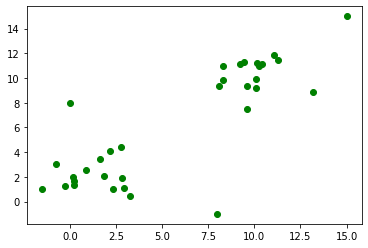

In [5]:
# generate two clusters of points with normal distributions.
means = [[1,1],[10,10]]
points1 = np.random.normal(means[0],scale=1.5,size=(15,2))
points2 = np.random.normal(means[1],scale=1.5,size=(15,2))
outliers = [[0,8],[8,-1],[15,15]]
points = np.concatenate([points1,points2,outliers],0)
plt.plot(points[:,0],points[:,1], 'o', color='green');

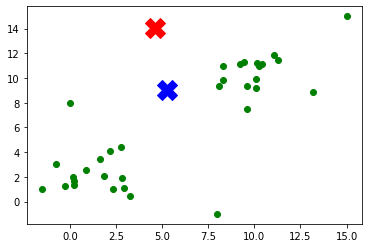

In [6]:
# Before inner loop of Kmeans. Initilize two random cluster centroids.
centroid1 = np.random.random(size=2)*15
centroid2 = np.random.random(size=2)*15
plt.plot(points[:,0],points[:,1], 'o', color='green');
plt.plot(centroid1[0],centroid1[1],marker='X',markersize=20, color='red');
plt.plot(centroid2[0],centroid2[1],marker='X',markersize=20, color='blue');

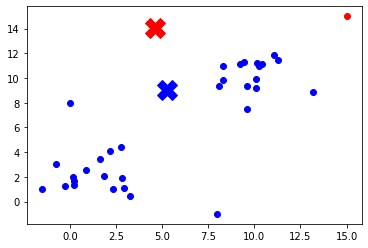

In [8]:
# innner loop of kmeans. cluster assignment step
def assignment(points,centroid1,centroid2, plot=True):
    cluster1 = []
    cluster2 = []
    for point in points:
        dist1 = np.linalg.norm(point - centroid1)
        dist2 = np.linalg.norm(point - centroid2)
        if dist1 < dist2:
            cluster1.append(point)
        else:
            cluster2.append(point)
    cluster1 = np.stack(cluster1,0)
    cluster2 = np.stack(cluster2,0)
    if plot:
        plt.plot(cluster1[:,0],cluster1[:,1], 'o', color='red');
        plt.plot(centroid1[0],centroid1[1],marker='X',markersize=20, color='red');

        plt.plot(cluster2[:,0],cluster2[:,1], 'o', color='blue');
        plt.plot(centroid2[0],centroid2[1],marker='X',markersize=20, color='blue');
    
    return cluster1, cluster2

    
cluster1, cluster2 = assignment(points,centroid1,centroid2, plot=True)

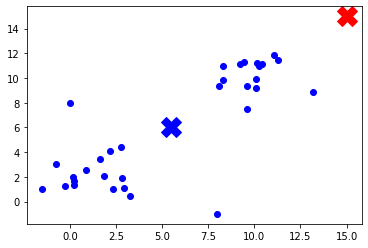

In [9]:
# innner loop of kmeans, update centroid step
def move_centroid(cluster1,cluster2, plot=True):
    centroid1 = np.mean(cluster1,0)
    centroid2 = np.mean(cluster2,0)
    
    if plot:
        plt.plot(cluster1[:,0],cluster1[:,1], 'o', color='red');
        plt.plot(centroid1[0],centroid1[1],marker='X',markersize=20, color='red');

        plt.plot(cluster2[:,0],cluster2[:,1], 'o', color='blue');
        plt.plot(centroid2[0],centroid2[1],marker='X',markersize=20, color='blue');
    
    return centroid1, centroid2
centroid1, centroid2 = move_centroid(cluster1,cluster2)

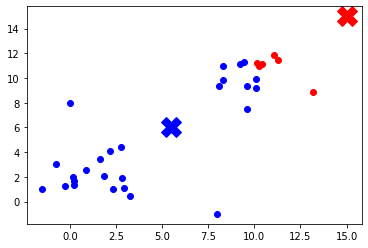

In [11]:
cluster1, cluster2 = assignment(points,centroid1,centroid2, plot=True)

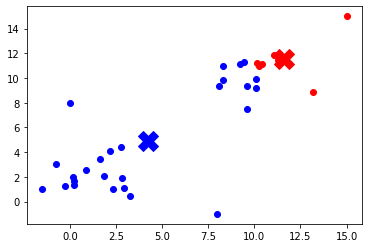

In [12]:
centroid1, centroid2 = move_centroid(cluster1,cluster2)

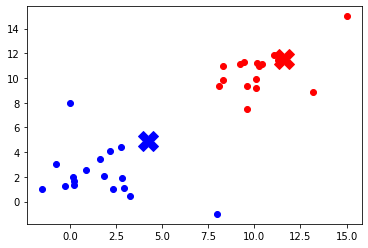

In [13]:
cluster1, cluster2 = assignment(points,centroid1,centroid2, plot=True)

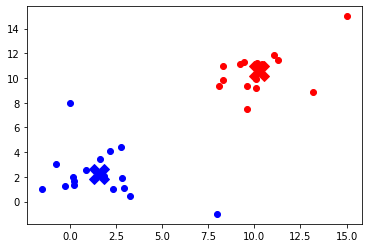

In [14]:
centroid1, centroid2 = move_centroid(cluster1,cluster2)

0.59,1.38,3.38,2.05,2.49,1.99,1.06,0.68,0.62,1.55,1.36,3.11,1.16,1.42,0.40,6.49,2.09,1.46,1.20,1.29,1.48,0.79,1.80,2.45,2.46,1.93,0.36,1.60,3.30,2.45,1.44,5.95,7.21


<BarContainer object of 33 artists>

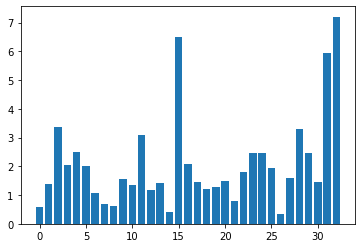

In [60]:
distances = []
for point in cluster1:
    distances.append(np.linalg.norm(point - centroid1))
for point in cluster2:
    distances.append(np.linalg.norm(point - centroid2))
print(','.join(['%.2f' % n for n in distances]))
plt.bar(np.arange(len(distances)),distances)

0.36,0.40,0.59,0.62,0.68,0.79,1.06,1.16,1.20,1.29,1.36,1.38,1.42,1.44,1.46,1.48,1.55,1.60,1.80,1.93,1.99,2.05,2.09,2.45,2.45,2.46,2.49,3.11,3.30,3.38,5.95,6.49,7.21


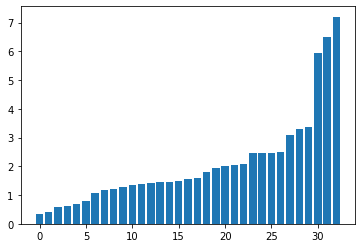

In [61]:
index = np.argsort(distances)
sorted_distances = np.sort(distances)
plt.bar(np.arange(len(distances)),sorted_distances)
number = int(len(sorted_distances)*0.1)
print(','.join(['%.2f' % n for n in sorted_distances]))
outliers = index[-number:]

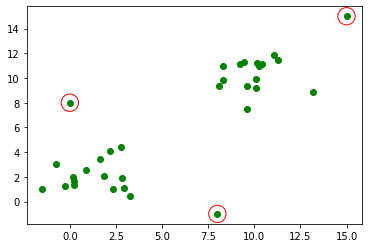

In [40]:
points = np.concatenate([cluster1,cluster2],0)
plt.plot(points[:,0],points[:,1], 'o', color='green');
outliers = np.array([points[i] for i in outliers])
plt.scatter(outliers[:,0],outliers[:,1], marker= 'o', facecolor='None',edgecolor='red',s=300);
